# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2019/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/ (invite code: KF2X3M)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [2]:
import random

realNumbers = []

while(len(realNumbers) < 5000):
    realNumbers.append(random.gauss(2, 0.125))
    
print(realNumbers)

[2.0732984942127834, 1.9394465667840424, 1.8350913308536556, 1.9120728707838697, 1.8908199750918298, 2.241966164430698, 2.2152892328779035, 1.8499330070650741, 2.0696076369510545, 2.0635459047068294, 1.9839095954740686, 2.0346018784401165, 1.8997443798373976, 2.0632926408945025, 2.015462411941098, 2.028330884829639, 1.7485142464500134, 1.70736338852782, 2.1200735973334957, 1.93724376147924, 1.98707158736213, 1.9344807709497105, 1.902074583598057, 1.8860106718502234, 2.027695074407393, 2.0961001479006116, 2.227641918500198, 1.946993368779029, 2.0373419094043634, 1.9573534163257331, 1.9444482035683897, 2.0080572902358687, 1.9377234259094658, 2.1232942668552512, 2.1484599030365454, 1.964208580258215, 1.7504093233560818, 1.8173136109291086, 1.7997092276631694, 1.9674571802891063, 1.8822366247313718, 2.1829847371483986, 2.2059984131704296, 2.1907822947191447, 1.7988375290759209, 2.0606019192281826, 1.960630240043963, 2.228946979355987, 1.9819067448019192, 2.0249821275410578, 1.8838316752108

  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

In [3]:
import numpy as np

h1, h2 = np.histogram(realNumbers, bins=10)

print("Histogram 1 : {}\nHistogram 2 : {}".format(h1, h2))

Histogram 1 : [   4   54  311  879 1464 1330  720  204   31    3]
Histogram 2 : [1.52151861 1.62020574 1.71889287 1.81758    1.91626712 2.01495425
 2.11364138 2.21232851 2.31101564 2.40970276 2.50838989]


  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

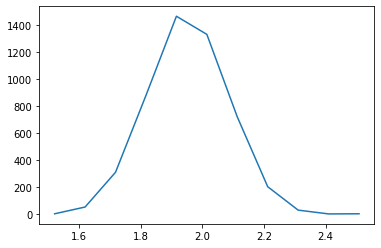

In [4]:
import matplotlib.pyplot as plt

h1 = np.resize(h1, (11, ))

plt.plot(h2, h1)

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [5]:
poissonIntegers = np.random.poisson(10, 5000)

print("Max : {}\nMin : {}".format(poissonIntegers.max(), poissonIntegers.min()))

Max : 23
Min : 1


   * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [6]:
v = [0 for i in range(poissonIntegers.max() + 1)]

for integer in poissonIntegers:
    v[integer] = v[integer] + 1

v = v[poissonIntegers.min() : poissonIntegers.max() + 1]

  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

<BarContainer object of 23 artists>

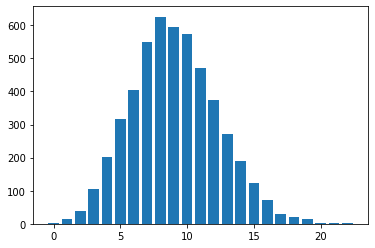

In [7]:
plt.bar(range(len(v)), v)

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

In [8]:
N = 5000
k = 10

p = k / (N - 1)

  * Now, use `networkx` to create the graph and extract the degree distribution.

In [9]:
import networkx as nx

erdo = nx.erdos_renyi_graph(N, p)

  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

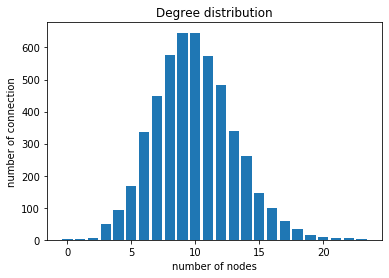

In [10]:
degreeDistribution = erdo.degree()

maxDegree = 0;

for node in degreeDistribution:
    if node[1] > maxDegree:
        maxDegree = node[1]

nodeCons = [0 for i in range(maxDegree + 1)]

for node in degreeDistribution:
    nodeCons[node[1]] = nodeCons[node[1]] + 1

degreeList = list(list(zip(*erdo.degree()))[1])

plt.bar(range(len(nodeCons)), nodeCons)
plt.title("Degree distribution")
plt.xlabel("number of nodes")
plt.ylabel("number of connection")
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Network Science Book

3.1. Erdős-Rényi Networks
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3.


    a) What is the expected number of links, 〈L〉?
    b) In which regime is the network?
    c) Calculate the probability pc so that the network is at the critical point.
    d) Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.
    e) For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
    f) Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

3.2. Generating Erdős-Rényi Networks

    1. Relying on the G(N, p) model, generate with a computer three networks with N = 500 nodes and average degree (a) 〈k〉 = 0.8, (b) 〈k〉 = 1 and (c) 〈k〉 = 8. Visualize these networks.




## Answers

3.1. 
a) Expected number of links in such a roandom graph is:
$$〈L〉= p \frac{N(N-1)}{2}  .$$
In our case (plugging in the numbers)
$$〈L〉= 10^{-3} \frac{3000(3000-1)}{2} = 4498.5 $$

b) This graph is in Supercritical Regime, since the $p$ used to generate the graph (the linking probbability) is $p= 0.001$, and $\frac{1}{N} = 0.0003$. So $p > \frac{1}{N}$ holds, and $p < \frac{\ln(3000)}{3000}$ also holds.

c) For the graph to be at critical point, the linking probabbility p of connecting two nodes must be arround $\frac{1}{N}$. In our case the $p_c$ is therefore:
$$ p_c = \frac{1}{3000} = 0.0003333333.$$

d) The linking probbability for us to only have one connected component has to be above $\frac{\ln(N)}{N}$. So with our linking probbability $p = 10^{-3}$, the number of nodes must be at least $N = 9119$ 

e) The average degree of nodes in a random network is calculated as: 
$$⟨k⟩ = p(N−1).$$
So again in our case plugging in the numbers from exercise under (d)) we get: 
$$⟨k_cr⟩ = p(N−1) = 10^{-3} \cdot (9119-1) = 9.118.$$

The average distance between nodes in graph is calculated as: 
$$⟨d⟩ \approx \frac{ln(N)}{ln(⟨k⟩)}.$$
Plugging in numbers we get:
$$⟨d⟩ \approx \frac{ln(9119}{ln(9.118)} = 4.1253.$$

f) When we approximate using Poisson degree distribution, we can calculate the $p_k$ using the following formula: 
$$p_k=e^{−⟨k⟩}\frac{⟨k⟩^k}{k!}.$$
Again plugging in numbers for the network in (d)) we get:
$$p_k=e^{−9.118}\frac{9.118^{9.118}}{9.118!} = 0.130916.$$
Note that we approximated factorial for real numbers using [Gamma function](https://en.wikipedia.org/wiki/Gamma_function)


In [11]:
# import math
# import sys
# p = 10**(-3)

# i = 2
# while True:
#     if p <= math.log(i)/i and p >= (math.log(i+1)/(i+1)):
#         print(i+1, math.log(i+1)/(i+1))
#         break
#     i+=1
    
# print(10**(-3)*(9119-1))

# print(math.log(9119)/math.log(9.118))

# kk = 9.118

# print(math.e**(-kk) * ( kk**kk / math.gamma(1+kk)))

/Users/lukaavbreht/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


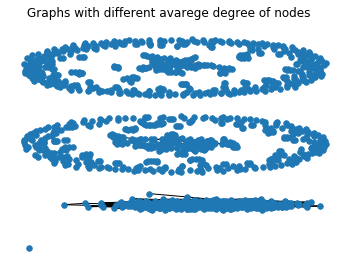

In [12]:
# 3.2)
N = 500
# degrees:
degrees = [0.8,1,8]

Graphs = list()
# Generate graphs with this property:
for deg in degrees:
    P = deg/(N-1)
    Graphs.append(nx.erdos_renyi_graph(N,p=P))

fig, axes = plt.subplots(3, 1)
fig.suptitle('Graphs with different avarege degree of nodes')
for i,deg in enumerate(degrees):
    plt.sca(axes[i])
    nx.draw(Graphs[i],node_size=30,label="Average degree : {0}".format(deg))
plt.show()
    


## Paths and random network visualization

Avarege degree:  1.6


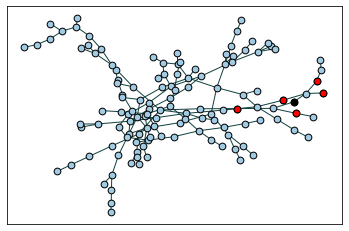

In [13]:
# Init parameters
n = 200
avg_deg = 1.5
p = avg_deg/(n-1)

# generate random graph
graph = nx.erdos_renyi_graph(n,p=p)

# check that avarege degree is arround 1.5
all_deg = 0
for i in graph.nodes:
    all_deg += graph.degree(i)
n=len(graph.nodes)
print("Avarege degree: ",all_deg/n)

# get all subplots
subgraphs = nx.connected_component_subgraphs(graph)
biggest_graph = None
max_size = 0
for sb in subgraphs:
    if (max_size < len(sb.nodes)):
        max_size = len(sb.nodes)
        biggest_graph = sb

# select random starting node (black node)
starting = random.randint(0,max_size-1)
black_node = list(biggest_graph.nodes)[starting]

paths_dict = nx.single_source_shortest_path_length(biggest_graph,black_node,2)
red_nodes = [i for i in paths_dict.keys() if paths_dict[i] == 2]

# draw the graph
node_size = 45

pos=nx.spring_layout(biggest_graph)
        
nx.draw_networkx_nodes(biggest_graph,pos,
                       nodelist=biggest_graph.nodes,
                       node_color="#A0CBE2",
                       edgecolors="#000000",
                       node_size=node_size,)

nx.draw_networkx_nodes(biggest_graph,pos,
                       nodelist=[black_node],
                       node_color="#000000",
                       node_size=node_size,)
nx.draw_networkx_nodes(biggest_graph,pos,
                       nodelist=red_nodes,
                       node_color="#ff0000",
                       edgecolors="#000000",
                       node_size=node_size,)

nx.draw_networkx_edges(biggest_graph,pos,
                      edge_color="#124341")


# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.